<a href="https://colab.research.google.com/github/toupasana/Supervised-ML---Classification-/blob/main/Copy_of_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Team Members:</b>
  * Upasana Kumari 
  * Arun Teja 
  * Zunaid 
  * Sukesh shetty

#### <b>Problem Statement:</b> The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such  as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) Predict variable (desired target) 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [219]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.Setting the Stage

<b>Importing Libraries</b>

In [220]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [221]:
#copy the data set path
path  = "/content/drive/MyDrive/Capstone Project/Supervised ML - Classification/Cardiovascular Risk Prediction/Copy of data_cardiovascular_risk.csv"

<b>Loading Dataset and Analysing</b>

In [222]:
crp_df = pd.read_csv(path)
#analyzing first five rows
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [223]:
#Identify different charachteristics of the dataset
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [224]:
#Identify the size
crp_df.shape

(3390, 17)

In [225]:
#Check the Statistical discription of numerical value in dataset
  
crp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


<b>Missing/NULL Values Treatment</b>

#### <u>Looking for the lost souls

* Why look for the null values?
 - these unrecorded information might play a prominent role in our analysis by providing us with important answers to hidden questions, might even lead us towards false predicitons and sometimes may not even affect at all. So it's always a better practice to catch the lost souls before moving on.

* Few doubts that pop up in our analytical minds are...

* How ubiquitous are the missing values?
* Are they random?
* Do they show a pattern?

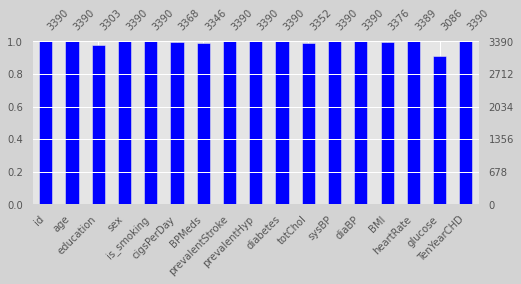

In [226]:
#Visualize the missing values
import missingno as msno
plt.figure(facecolor='lightgray')
msno.bar(crp_df,color='blue',figsize=[8,3],fontsize=10)
plt.show()

* Moving on with the next steps, let's take a sneak peek at the count and percentages of the null values before we proceed further...

In [227]:
#Dig into the count and percentages
tot_missing = crp_df.isnull().sum().sort_values(ascending=False)
percent_missing = (crp_df.isnull().sum()* 100 / len(crp_df)).round(2).sort_values(ascending=False)
lost_souls = pd.concat([tot_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
lost_souls.head(20)

,Total,Percentage
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03
id,0,0.00
diaBP,0,0.00
sysBP,0,0.00


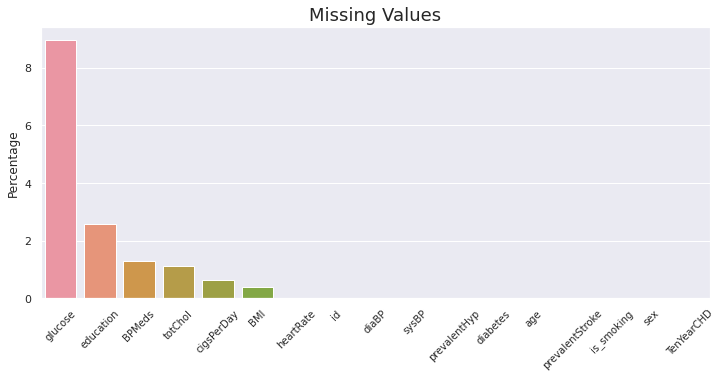

In [228]:
#Visualize the missing numbers
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

vis_missing = sns.barplot(x=lost_souls.index, y='Percentage', data=lost_souls)

vis_missing.set_title('Missing Values', fontsize = 18)
vis_missing.set_xticklabels(vis_missing.get_xmajorticklabels(), fontsize =10, rotation=45)
plt.show()

* Mmmmm...magnificent! This reveals columns "glucose" , "education","BPMeds" , 'totChol', "cigsPerDay", and "BMI". only need a quick replacement with the ever loving number '0' used when filling up the null values in data analysis. But before that let's get rid of the unwanted!

In [229]:
#Using Statistical mean for glucose,totChol,BMI,heartRate column of the data,and education,BPMeds, cigsPerDay filling with 0 or 1
crp_df = crp_df.fillna({'glucose':(crp_df['glucose'].mean()),
                'education':1,
                'BPMeds':0,
                'totChol':(crp_df['totChol'].mean()),
                'cigsPerDay':0,
                "BMI":(crp_df['BMI'].mean()),
                'heartRate':(crp_df['heartRate'].mean())
                })

In [230]:
#Afer data inputation we will cross check tthe null values
crp_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* <b>Why remove them?</b>
 - Columns "id" is the irrelevant and insignificant to our data analysis since they will not provide crucial insights to our questions. Hence, we shall take our first move by removing them...

In [231]:
#Kick out the misfits
crp_df.drop(['id'],axis=1,inplace=True)

In [232]:
#A quick look at the new results
crp_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


* Voila! Done and dusted! Removing the misfits have cleared the path to a better concise understanding of the dataset. What else is better than data that's not noisy!

But, One more step to go...

<b>Bringing in the most wanted!</b>

In [233]:
#Shows the required columns list
list(crp_df.columns)

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

* Filling the rows which has higher than 5% null and lower than 30% null values

In [234]:
independent_ver =['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

<b><u>Target Variable</b>

In [235]:
#Check the value of dependent/Target Variable values
crp_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

### <b>Explanatory Data Analysis</b>

In [236]:
#Storing all the features which has continuous values
continuous_variables = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [237]:
other_variables = ['education','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']

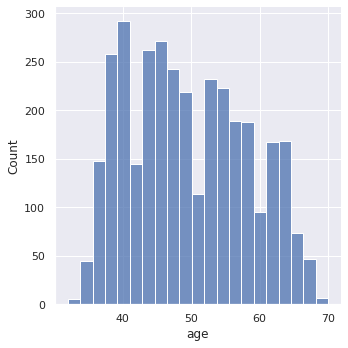

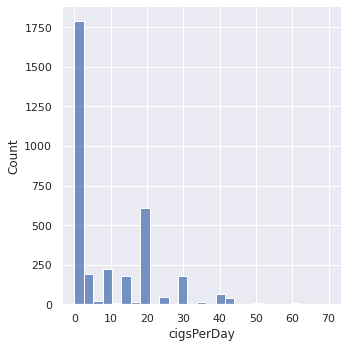

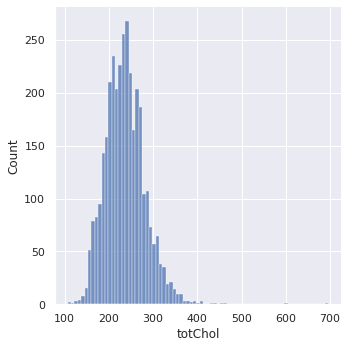

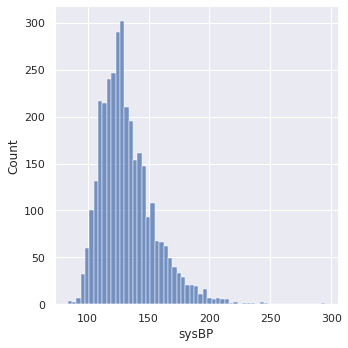

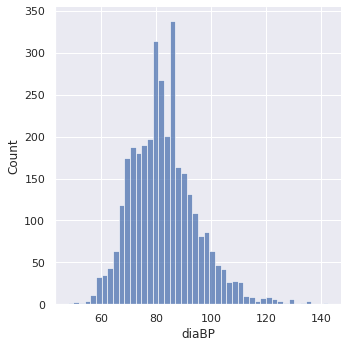

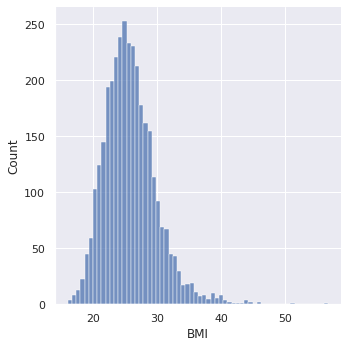

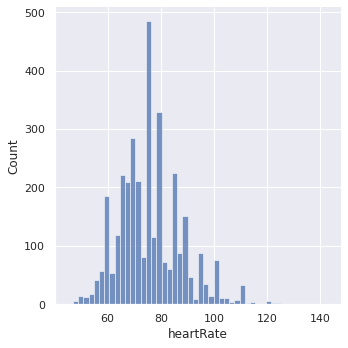

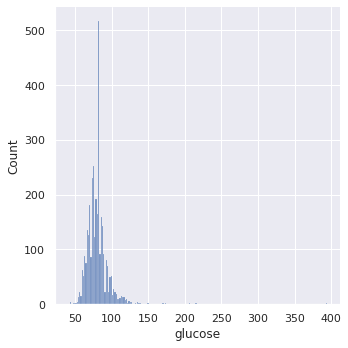

In [238]:
#Analyzing the distribution of all the features which has continuous values
for col in continuous_variables:
  sns.displot(crp_df[col])
plt.show()

* Age

In [239]:
#Checking the values of age column
crp_df['age'].value_counts()

40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64

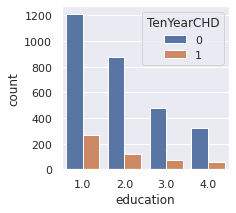

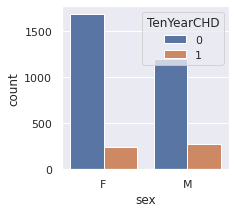

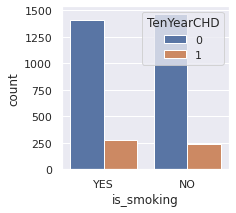

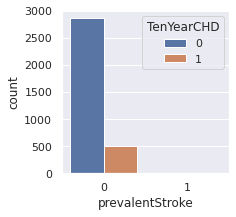

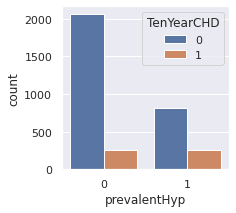

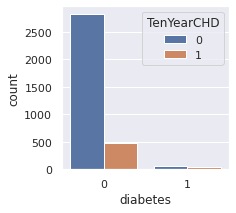

In [240]:
#Counting all the encoded values where other_variables variable is the parameter
sns.set(rc={'figure.figsize':(3,3)})
for col in other_variables:
  sns.countplot(x=crp_df[col],hue=crp_df['TenYearCHD'],data=crp_df)
  plt.show()

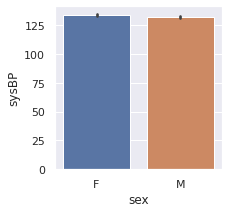

In [241]:
#sysBP varying amomng the genders
sns.set(rc={'figure.figsize':(3,3)})
sns.barplot(x=crp_df['sex'],y=crp_df['sysBP'],data=crp_df)
plt.show()

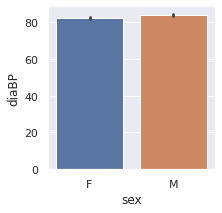

In [242]:
#diaBP varying among the genders
sns.set(rc={'figure.figsize':(3,3)})
sns.barplot(x=crp_df['sex'],y=crp_df['diaBP'],data=crp_df)
plt.show()

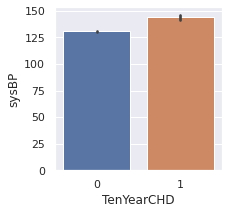

In [243]:
#sysBP of a person who is at risk and who isn't
sns.set(rc={'figure.figsize':(3,3)})
sns.barplot(x=crp_df['TenYearCHD'],y=crp_df['sysBP'],data=crp_df)
plt.show()

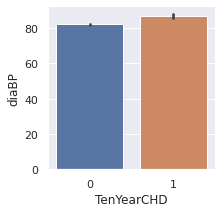

In [244]:
#diaBP of a person who is at risk and who isn't
sns.barplot(x=crp_df['TenYearCHD'],y=crp_df['diaBP'],data=crp_df)
plt.show()

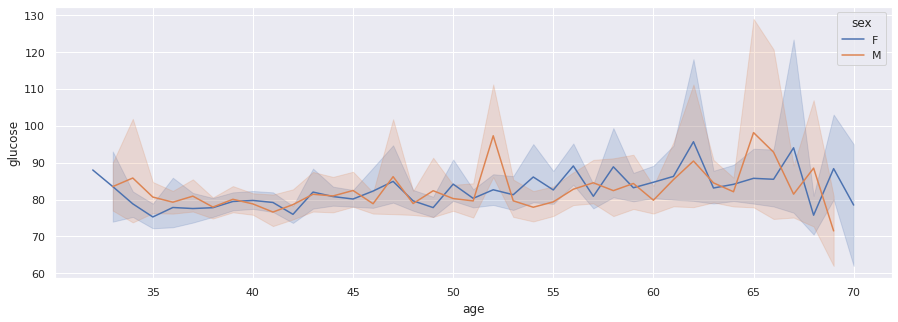

In [245]:
#Finding When a person gets old how much their glucose level varies
plt.figure(figsize=(15,5))
sns.lineplot(x=crp_df['age'],y=crp_df['glucose'],hue=crp_df['sex'],data=crp_df)
plt.show()

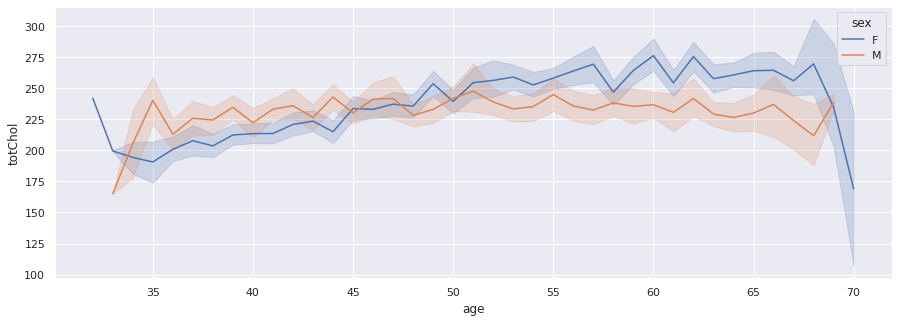

In [246]:
#Finding when a person gets old how much Cholestrol level varies
plt.figure(figsize=(15,5))
sns.lineplot(x=crp_df['age'],y=crp_df['totChol'],hue=crp_df['sex'],data=crp_df)
plt.show()

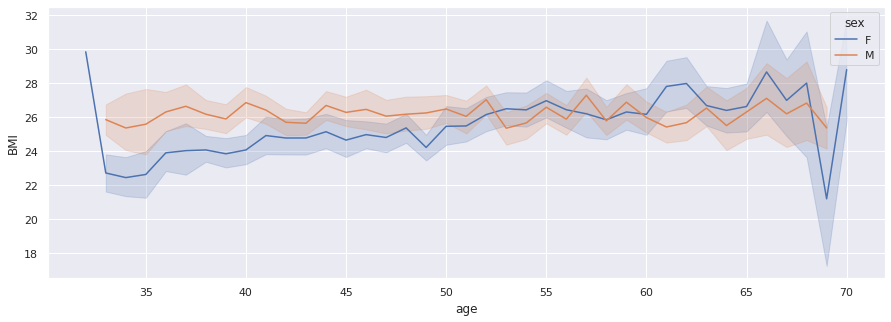

In [247]:
#Finding when a person gets old how much their BMI level varies
plt.figure(figsize=(15,5))
sns.lineplot(x=crp_df['age'],y=crp_df['BMI'],hue=crp_df['sex'],data=crp_df)
plt.show()

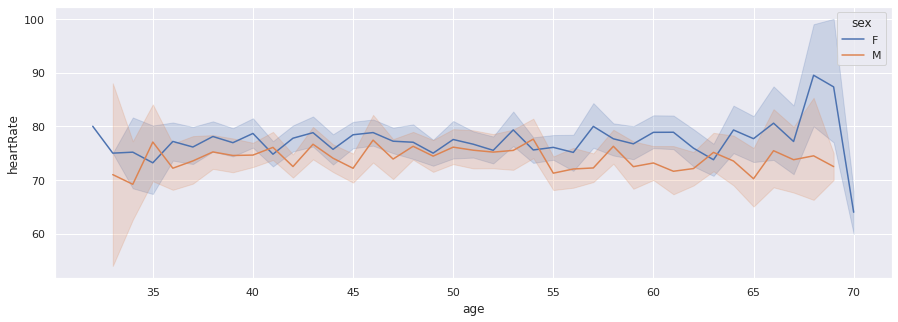

In [248]:
#Finding when a person gets old how much their heart rate level varies
plt.figure(figsize=(15,5))
sns.lineplot(x=crp_df['age'],y=crp_df['heartRate'],hue=crp_df['sex'],data=crp_df)
plt.show()

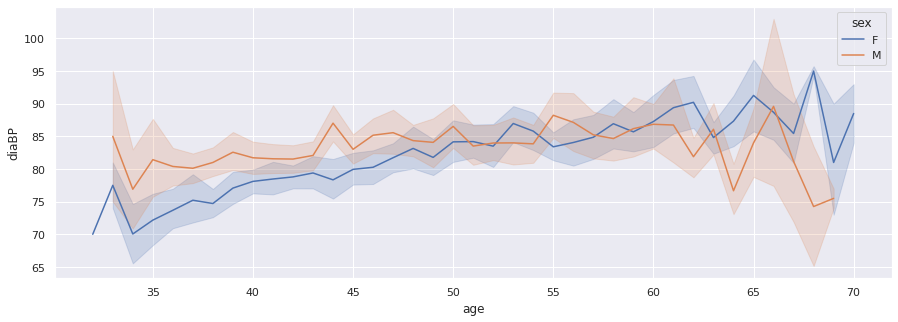

In [249]:
#Finding when a person gets old how much their diaBP level varies
plt.figure(figsize=(15,5))
sns.lineplot(x=crp_df['age'],y=crp_df['diaBP'],hue=crp_df['sex'],data=crp_df)
plt.show()

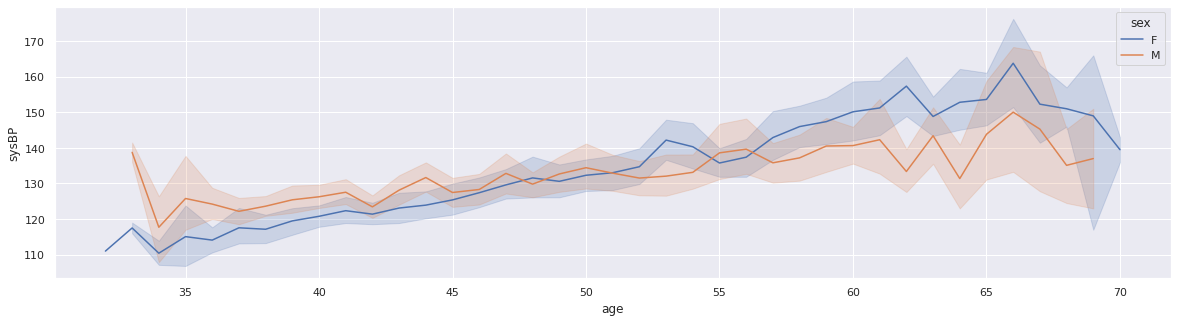

In [250]:
#Finding when a person gets old how much their sysBP level varies
plt.figure(figsize=(20,5))
sns.lineplot(x=crp_df['age'],y=crp_df['sysBP'],hue=crp_df['sex'],data=crp_df)
plt.show()

### <b>Outliers Checking</b>

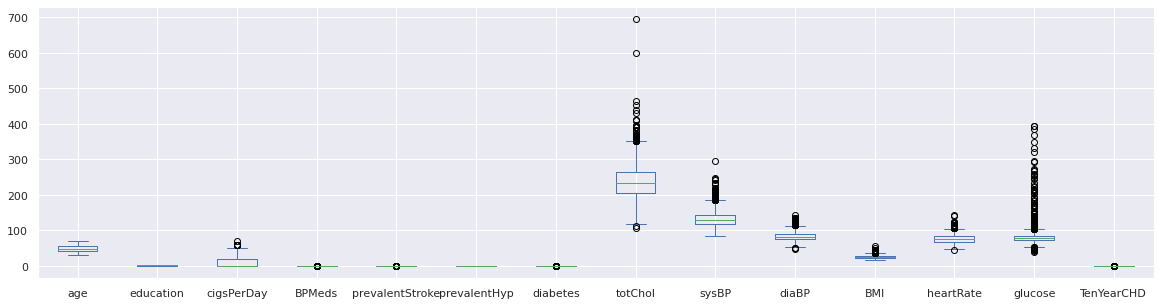

In [251]:
#Box Plot for analyzing the outliers
crp_df.plot(kind='box',figsize=(20,5))
plt.show()

* cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose. these features having outliers..

In [252]:
#Stored all the features where we want to remove outliers
outlier_col = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

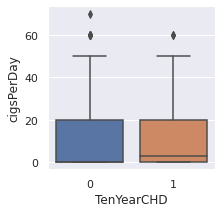

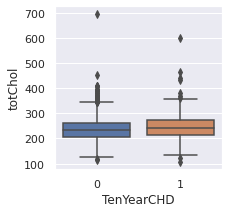

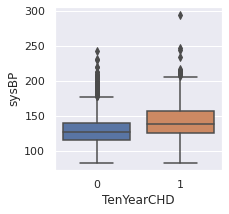

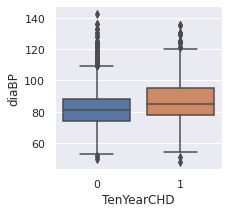

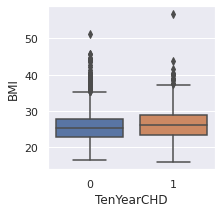

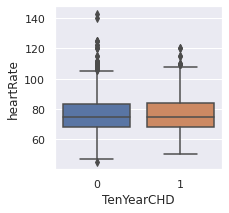

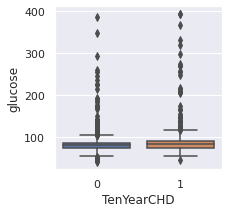

In [253]:
#Analyzing the outliers with targate  columns
for col in outlier_col:
  sns.boxplot(x=crp_df['TenYearCHD'],y=crp_df[col],data=crp_df)
  plt.show()

* As per our visuvalisation of outliers, we are setting the range of quatile (0.15 to .085) ,to make our data clean and outlier free.

In [254]:
#Handling Outliers
crp_df[outlier_col]=crp_df[outlier_col].clip(lower=crp_df[outlier_col].quantile(0.15),upper=crp_df[outlier_col].quantile(0.85),axis=1)

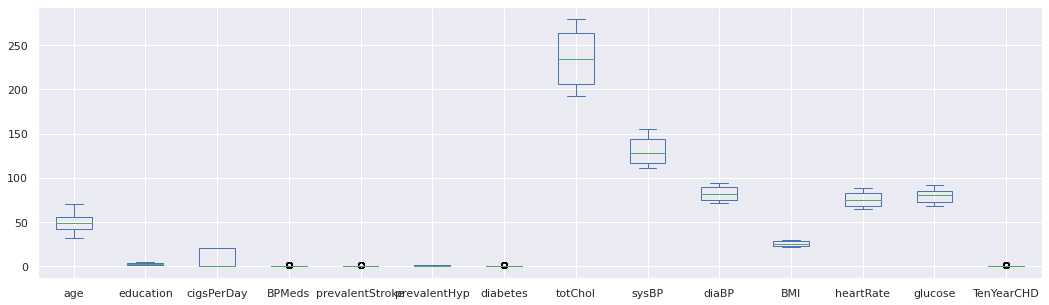

In [255]:
#Box plot after handling outliers , we can visuvalise our outlier free data..
crp_df.plot(kind='box',figsize=(18,5))
plt.show()

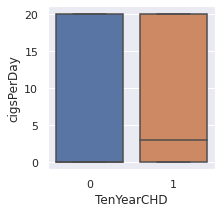

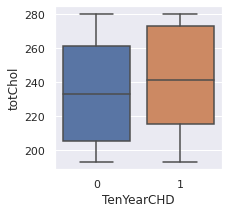

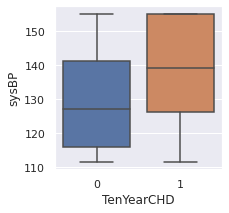

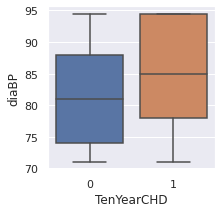

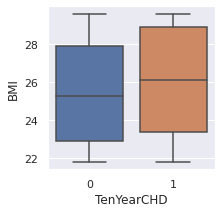

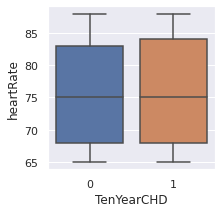

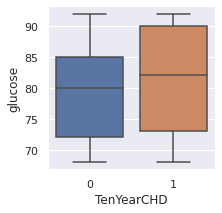

In [256]:
#plot the culumns data after outlier treatment
for col in outlier_col:
  sns.boxplot(x=crp_df['TenYearCHD'],y=crp_df[col],data=crp_df)
  plt.show()

### <b>Check the Corelation /Multicollinearity of data</d>

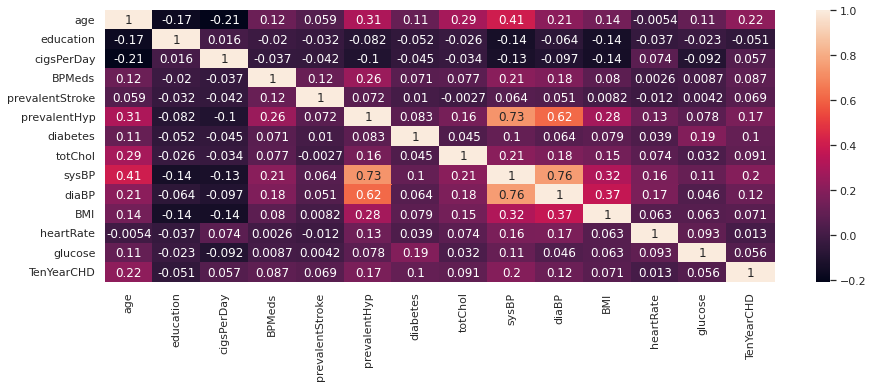

In [257]:
# Corelation between the data in dataset

# Heatmap:
plt.figure(figsize=(15,5))
sns.heatmap(crp_df.corr(),annot=True)
plt.show()

* As per our  Heat  map graph we can see some features having high collinearity with other independent features.

In [258]:
import numpy as np
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [259]:
# we are putting  threshold as 0.7 to get the Highly correlated Columns
corr_features = correlation(crp_df, 0.7)
print(len(set(corr_features)))
#print the column name
print(corr_features)

2
{'sysBP', 'diaBP'}


In [260]:
#As per the higher corelation of these two coloumns, we are droping those features and make a copy of data for further analysis..
crp_df_copy = crp_df.drop(corr_features,axis=1)

### <b>Label Encoding</b>

In [261]:
#Mapping the Variables
crp_df_copy['is_smoking']=crp_df_copy['is_smoking'].map({'YES':1,'NO':0})
crp_df_copy['sex']=crp_df_copy['sex'].map({'M':0,'F':1})

* Machine can't understand the textual / Categorical data so, we need to convert it in to numarical formate in above code

In [262]:
#check the columns
crp_df_copy[['is_smoking','sex']].head()

,is_smoking,sex
0,1,1
1,0,0
2,1,1
3,1,0
4,1,1


### <b>Feature Selection</b>

In [263]:
#feature selection for ML modeling
X = crp_df_copy.iloc[:,0:-1].values
y=crp_df_copy['TenYearCHD'].values

In [264]:
X.shape,y.shape

((3390, 13), (3390,))

##### <b>Splitting & Scaling data</b>

In [265]:
#Splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size = 0.2,random_state= 0)

In [266]:
#Checking the shape of our training and testing datasets
print('X_train=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)

X_train= (2712, 13)
X_test= (678, 13)
y_train= (2712,)
y_test= (678,)


####<b>Scaling</b>

In [267]:
#Using Standard Scaler to scale 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
X.shape,y.shape

((3390, 13), (3390,))

###<b>Logistic Regression</b>

In [268]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()
#Fitting the training datasets
Log.fit(X_train,y_train)

LogisticRegression()

In [269]:
#predicting on training dataset
y_pred_log_train = Log.predict(X_train)
#predicting on testing dataset
y_pred_log_test = Log.predict(X_test)

#### Classification Evaluation Metrics on Logistic Regression.

In [270]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [271]:

#Accuracy score of training
log_acc_train = accuracy_score(y_train,y_pred_log_train)*100
log_acc_train

85.50884955752213

In [272]:
#Confusion Metrics of training data
cm_log_train = confusion_matrix(y_train,y_pred_log_train)
print('Confusion Metrics of training data')
cm_log_train

Confusion Metrics of training data


array([[2291,   14],
       [ 379,   28]])

In [273]:
#Confusion Metrics of testing
cm_log_test = confusion_matrix(y_test,y_pred_log_test)
print('Confusion Metrics of testing data')
cm_log_test

Confusion Metrics of testing data


array([[571,   3],
       [ 96,   8]])

In [274]:
#Classification Report of training
print('Classification Report of training\n')
print(classification_report(y_train,y_pred_log_train))
#Classification report of testing
print('--------------------------------------------------')
print('Classification Report of testing\n')
print(classification_report(y_test,y_pred_log_test))

Classification Report of training

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2305
           1       0.67      0.07      0.12       407

    accuracy                           0.86      2712
   macro avg       0.76      0.53      0.52      2712
weighted avg       0.83      0.86      0.80      2712

--------------------------------------------------
Classification Report of testing

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       574
           1       0.73      0.08      0.14       104

    accuracy                           0.85       678
   macro avg       0.79      0.54      0.53       678
weighted avg       0.84      0.85      0.80       678



##### As our data is highly imbalance so we have to improve this

<b>Using Smotek Technique for improvement

In [275]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [276]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [277]:

X_res.shape,y_res.shape,X.shape,y.shape

((5658, 13), (5658,), (3390, 13), (3390,))

<b>Splitting & scaling data after Smotek Technique

In [278]:
#Splitting the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.30, random_state=0)

In [279]:
X_train_res.shape,y_train_res.shape

((3960, 13), (3960,))

In [280]:
#Scaling the data
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.transform(X_test_res)
X_train_res.shape,y_train_res.shape

((3960, 13), (3960,))

<b>Implementing Logistic Regression after using Smotek Technique

In [281]:
model_smotek = LogisticRegression()
model_smotek.fit(X_train_res,y_train_res)

LogisticRegression()

<b>Classification Evaluation Metrics on Logistic Regression after using Logistic Regression

In [282]:
y_pred_smotek_train = model_smotek.predict(X_train_res)
y_pred_smotek_test = model_smotek.predict(X_test_res)

In [283]:
#Accuaracy score of training
log_acc_train = accuracy_score(y_train_res,y_pred_smotek_train)*100
log_acc_train

68.96464646464646

In [284]:
#Confusion Matrix of training
confusion_matrix(y_train_res,y_pred_smotek_train)

array([[1343,  640],
       [ 589, 1388]])

In [285]:
#Classification report of training
print(classification_report(y_train_res,y_pred_smotek_train))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1983
           1       0.68      0.70      0.69      1977

    accuracy                           0.69      3960
   macro avg       0.69      0.69      0.69      3960
weighted avg       0.69      0.69      0.69      3960



In [286]:
#Accuaracy score of testing
log_acc_test = accuracy_score(y_test_res,y_pred_smotek_test)*100
log_acc_test

67.1967020023557

In [287]:
#Confusion Matrix of testing
confusion_matrix(y_test_res,y_pred_smotek_test)

array([[548, 298],
       [259, 593]])

In [288]:
#Classification report of testing
print(classification_report(y_test_res,y_pred_smotek_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       846
           1       0.67      0.70      0.68       852

    accuracy                           0.67      1698
   macro avg       0.67      0.67      0.67      1698
weighted avg       0.67      0.67      0.67      1698



* From the above Classification report our data is well balanced and traing and test accuracy almost same i.e, 68%

###<b>RANDOM FOREST

In [289]:
from sklearn.ensemble import  RandomForestClassifier

In [290]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
#Fitting Random Forest Classifier on training dataset
rfc.fit(X_train_res, y_train_res)


RandomForestClassifier(max_depth=2, random_state=0)

In [291]:
#predicting on training & testing datasets
rfc_pred_train = rfc.predict(X_train_res)
rfc_pred_test = rfc.predict(X_test_res)


<b>Classification Evaluation Metrics on Random Forest Classifier

In [292]:
#Accuracy score, confusion matrix and classification report of training 
rfc_acc_train = accuracy_score(y_train_res,rfc_pred_train)*100
print('Accuracy score on training data of Random Forest',rfc_acc_train)
print('confusion matrix \n',confusion_matrix(y_train_res,rfc_pred_train))
print('--------------classification_report-----------------')
print(classification_report(y_train_res,rfc_pred_train))

Accuracy score on training data of Random Forest 73.93939393939394
confusion matrix 
 [[1428  555]
 [ 477 1500]]
--------------classification_report-----------------
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1983
           1       0.73      0.76      0.74      1977

    accuracy                           0.74      3960
   macro avg       0.74      0.74      0.74      3960
weighted avg       0.74      0.74      0.74      3960



In [293]:
#Accuracy score, confusion matrix and classification report of testing
rfc_acc_test = accuracy_score(y_test_res,rfc_pred_test)*100
print('Accuracy score on testing data of Random Forest',rfc_acc_test)
print('confusion matrix \n',confusion_matrix(y_test_res,rfc_pred_test))
print('--------------classification_report-----------------')
print(classification_report(y_test_res,rfc_pred_test))

Accuracy score on testing data of Random Forest 75.02944640753827
confusion matrix 
 [[607 239]
 [185 667]]
--------------classification_report-----------------
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       846
           1       0.74      0.78      0.76       852

    accuracy                           0.75      1698
   macro avg       0.75      0.75      0.75      1698
weighted avg       0.75      0.75      0.75      1698



In [294]:
#Check the roc score
roc_auc_score(y_test_res,rfc_pred_test)

0.7501789697998867

# From the above Classification report our data is well balanced and traing and test accuracy almost same i.e, 70% and 72% respectively.

### <b>KNN

In [295]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [296]:


#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,leaf_size=30,weights="uniform")
    
    # Fit the model
    knn.fit(X_train_res, y_train_res)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_res, y_train_res)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_res, y_test_res)

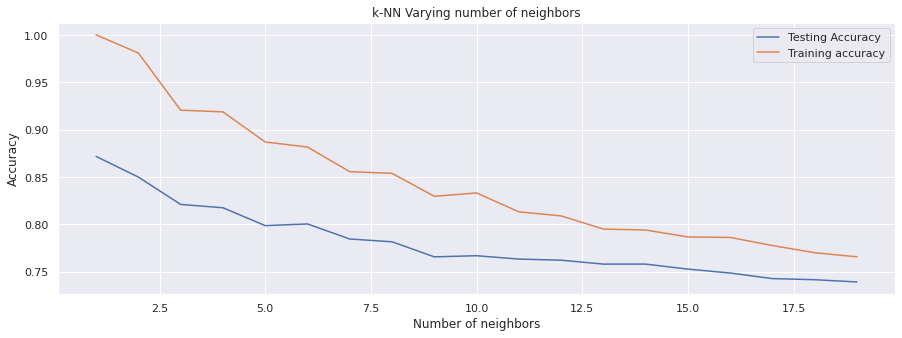

In [297]:
#plot the graph 
plt.figure(figsize=(15,5))

# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

* from the above graph we can select k=12 as a best parameter to avoid over and underfitting..

In [298]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=12)
# Fit the model
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=12)

In [299]:
knn.score(X_test_res,y_test_res)

0.7620730270906949

In [300]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve
# Let us get the predictions using the classifier we had fit above
y_pred_test = knn.predict(X_test_res)
y_pred_train = knn.predict(X_train_res)

<b>Classification Evaluation Metrics on KNN</b>

In [301]:
#Accuracy score, confusion matrix and classification report of training 
knn_acc_train = accuracy_score(y_train_res,y_pred_train)*100
print('Accuracy score on Training of KNN',knn_acc_train)
print('confusion matrix \n',confusion_matrix(y_train_res,y_pred_train))
print('-------------------classification report -----------------------')
print(classification_report(y_train_res,y_pred_train))

Accuracy score on Training of KNN 80.88383838383838
confusion matrix 
 [[1551  432]
 [ 325 1652]]
-------------------classification report -----------------------
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1983
           1       0.79      0.84      0.81      1977

    accuracy                           0.81      3960
   macro avg       0.81      0.81      0.81      3960
weighted avg       0.81      0.81      0.81      3960



In [302]:
#Accuracy score, confusion matrix and classification report of testing
knn_acc_test = accuracy_score(y_test_res,y_pred_test)*100
print('Accuracy score on testing data of KNN',rfc_acc_test)
print('confusion matrix\n',confusion_matrix(y_test_res,y_pred_test))
print('-------------------classification report -----------------------')
print(classification_report(y_test_res,y_pred_test))

Accuracy score on testing data of KNN 75.02944640753827
confusion matrix
 [[596 250]
 [154 698]]
-------------------classification report -----------------------
              precision    recall  f1-score   support

           0       0.79      0.70      0.75       846
           1       0.74      0.82      0.78       852

    accuracy                           0.76      1698
   macro avg       0.77      0.76      0.76      1698
weighted avg       0.77      0.76      0.76      1698



* From the above Classification report our data is well balanced and traing and test accuracy almost same i.e, 79% and 81% respectively..

In [303]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [304]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

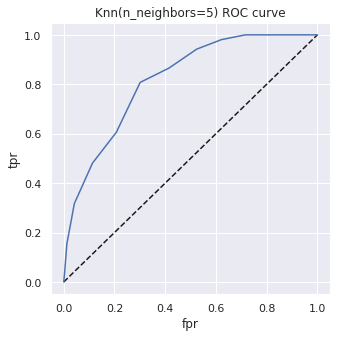

In [305]:
#plot the ROC curve
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [306]:
# Area under ROC curve
print("Area under ROC curve  ",roc_auc_score(y_test,y_pred_proba))

Area under ROC curve   0.8188655856338782


<b>Hyperparameter tuning using GridSearchCV on KNN

In [307]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# In case of classifier like KNN the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [308]:
knn= KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=4)

In [309]:
#fit the train data
knn_cv.fit(X_train_res,y_train_res)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [310]:
#fit the test data
knn_cv.fit(X_test_res,y_test_res) #X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.20, random_state=0)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [311]:
#predict the train and test data
y_pred_train_knn_cv = knn_cv.predict(X_train_res)
y_pred_test_knn_cv =  knn_cv.predict(X_test_res)

In [312]:
# After predict check the Accuracy score, confusion matrix and classification report of training 
knn_cv_acc_train = accuracy_score(y_train_res,y_pred_train_knn_cv)*100
print('Accuracy score on training data  ',knn_cv_acc_train)
print('confusion matrix \n',confusion_matrix(y_train_res,y_pred_train_knn_cv))
print('-----------------------classification report of training----------------------')
print(classification_report(y_train_res,y_pred_train_knn_cv))

Accuracy score on training data   80.0
confusion matrix 
 [[1418  565]
 [ 227 1750]]
-----------------------classification report of training----------------------
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1983
           1       0.76      0.89      0.82      1977

    accuracy                           0.80      3960
   macro avg       0.81      0.80      0.80      3960
weighted avg       0.81      0.80      0.80      3960



In [313]:
#Accuracy score, confusion matrix and classification report of training 
knn_cv_acc_test = accuracy_score(y_test_res,y_pred_test_knn_cv)*100
print('Accuracy score on testing data',knn_cv_acc_test)
print('confusion matrix \n',confusion_matrix(y_test_res,y_pred_test_knn_cv))
print('---------------------Classification report of testing data ------------------------')
print(classification_report(y_test_res,y_pred_test_knn_cv))

Accuracy score on testing data 100.0
confusion matrix 
 [[846   0]
 [  0 852]]
---------------------Classification report of testing data ------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1698
   macro avg       1.00      1.00      1.00      1698
weighted avg       1.00      1.00      1.00      1698



###<b> Support Vector Machine (SVM)</b>

In [314]:
from sklearn.svm import SVC

In [315]:
svc = SVC(C=100,gamma=0.001,kernel='rbf')
#Fitting SVM on training dataset
svc.fit(X_train_res,y_train_res)

SVC(C=100, gamma=0.001)

In [316]:
#predicting on training dataset
y_pred_train_svm = svc.predict(X_train_res)
#predicting on testing dataset
y_pred_test_svm = svc.predict(X_test_res)

<b>Classification Evaluation Metrics on SVM.

In [317]:
#Accuracy score, confusion matrix and classification report of training 
acc_svm_train= accuracy_score(y_pred_train_svm,y_train_res)*100
print('Accuracy score of training',acc_svm_train)
cmm = confusion_matrix(y_pred_train_svm,y_train_res)
print('confusion matrix\n',cmm)
crr = classification_report(y_pred_train_svm,y_train_res)
print('-------------------classification report--------------------')
print(crr)

Accuracy score of training 71.81818181818181
confusion matrix
 [[1385  518]
 [ 598 1459]]
-------------------classification report--------------------
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1903
           1       0.74      0.71      0.72      2057

    accuracy                           0.72      3960
   macro avg       0.72      0.72      0.72      3960
weighted avg       0.72      0.72      0.72      3960



In [318]:
#Accuracy score, confusion matrix and classification report of test
acc_svm_test = accuracy_score(y_test_res,y_pred_test_svm)*100
print('Accuracy score of test data',acc_svm_test)
print('confusion_matrix\n',confusion_matrix(y_pred_test_svm,y_test_res))
print('----------------------classification report--------------------')
print(classification_report(y_pred_test_svm,y_test_res))

Accuracy score of test data 71.43698468786808
confusion_matrix
 [[579 218]
 [267 634]]
----------------------classification report--------------------
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       797
           1       0.74      0.70      0.72       901

    accuracy                           0.71      1698
   macro avg       0.71      0.72      0.71      1698
weighted avg       0.72      0.71      0.71      1698



* From the above Classification report our data is well balanced and traing and test accuracy almost same i.e, 72% and 71% respectively..

<b>Hyperparameter tuning using GridSearchCV on SVM

In [319]:
from sklearn.model_selection import GridSearchCV

In [320]:
#Making a parameters dict where all parameters is of SVM
param_grid={'C':[0.1,1,10,30,50,80,100,1000],'gamma':[1,0.1,0.001,0.0001],'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=10)

In [212]:
#Fitting on training dataset
grid.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.563 total time=   0.8s
[CV 2/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.567 total time=   0.8s
[CV 3/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   0.8s
[CV 4/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.8s
[CV 5/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.538 total time=   0.8s
[CV 1/5; 2/32] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/5; 2/32] END C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 30, 50, 80, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=10)

In [213]:
#getting the best parameters
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [214]:
svc_2 = SVC(C=10,gamma=1,kernel='rbf')
#Fitting on training dataset using the best parameters
svc_2.fit(X_train_res,y_train_res)

SVC(C=10, gamma=1)

<b>Classification Evaluation Metrics on SVM after Hyperparameter tuning

In [215]:
#predicting on training and testing dataset after using the best parameters
y_pred_train_svm_grid = svc_2.predict(X_train_res)
y_pred_test_svm_grid = svc_2.predict(X_test_res)

In [216]:
#Accuracy score, confusion matrix and classification report of training 
acc_svm_train_grid = accuracy_score(y_train_res,y_pred_train_svm_grid)*100
print(acc_svm_train_grid)
cmm_svm_train_grid = confusion_matrix(y_pred_train_svm_grid,y_train_res)
print(cmm_svm_train_grid)
crr_svm_train_grid = classification_report(y_pred_train_svm_grid,y_train_res)
print(crr_svm_train_grid)

100.0
[[1983    0]
 [   0 1977]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1983
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960



In [217]:
#Accuracy score, confusion matrix and classification report of testing
acc_svm_test_grid = accuracy_score(y_test_res,y_pred_test_svm_grid)*100
print(acc_svm_test_grid)
print(confusion_matrix(y_pred_test_svm_grid,y_test_res))
print(classification_report(y_pred_test_svm_grid,y_test_res))

88.39811542991754
[[738  89]
 [108 763]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       827
           1       0.90      0.88      0.89       871

    accuracy                           0.88      1698
   macro avg       0.88      0.88      0.88      1698
weighted avg       0.88      0.88      0.88      1698



###<b>Comparision of evaluation metrics of the models being used

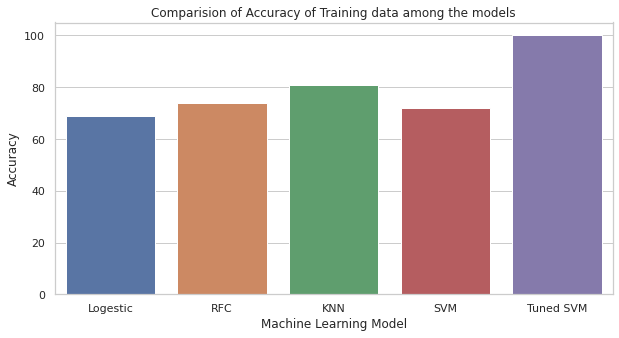

In [321]:
#Ploting the Comparision of Accuracy of Training data among the models
models = ['Logestic','RFC','KNN','SVM','Tuned SVM']
acc = [log_acc_train,rfc_acc_train,knn_acc_train,acc_svm_train,acc_svm_train_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
sns.barplot(x= models, y= acc)
plt.title('Comparision of Accuracy of Training data among the models')
plt.show()

* we can observe that Tuned SVM , Knn and RFC are really performing well on training data..

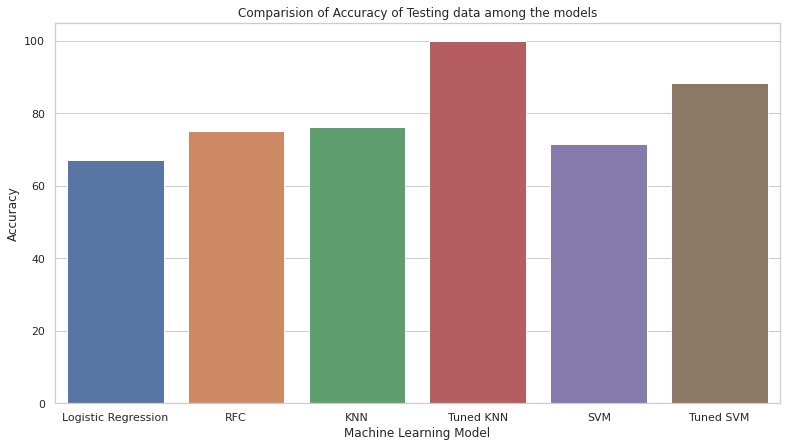

In [322]:
#Ploting the Comparision of Accuracy of Testing data among the models
models = ['Logistic Regression','RFC','KNN','Tuned KNN','SVM','Tuned SVM']
acc = [log_acc_test,rfc_acc_test,knn_acc_test,knn_cv_acc_test,acc_svm_test,acc_svm_test_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(13,7))
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
sns.barplot(x= models, y= acc)
plt.title('Comparision of Accuracy of Testing data among the models')
plt.show()

<b>Here also Tuned SVM,KNN and RFC are performing well but in tuned SVM we saw the overfitting but Accuracy was imporved with hyper parameter tuning


* The following columns lie in the range:

 - totChol: 150 to 300 
 - sysBP: 100 to 150
 - diaBP: 60 to 100 
 - BMI: 20 to 30
 - heartRate: 50 to 100 
 - glucose: 50 to 150
 - Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers

- No currentSmokers observed below the age of 32
- Maximum age for a currentSmokers is 70
- Males have shown a slightly higher risk of coronary heart disease TenYearCHD.
- Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
- No currentSmokers observed below the age of 32
- Low cigsPerDay comes with lower risk of CHD.
- Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
- Minor relation of higher risk of TenYearCHD found with higher sysBP AND higher diaBP
- Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.
- Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease. Again, age, total cholesterol level, diastolic blood pressure, BMI, and glucose level are the main culprits leading to heart diseases,especially CHD. These models show that our analysis is highly accurate. Since Light GBM gives the best score in testing(95%), we can trust on this model, [Tuned KNN and Tuned Svm ]

##<b>Summary

After running through a multitude of models and changing the scale I believe the best model it's the Tuned SVM, it remained the most consistent . These were the models  that rent tained a above 80% + accuracy level when ran. Both theKNN and RFC also were solid as well.I think the next step would be to play around with the parameters a bit more in each model just to be certain and entertain a GridSearch on the top perfomring models. 